In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
global_temp=global_temp.dropna()
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['Year'] = global_temp['dt'].dt.year

In [3]:
global_temp=global_temp[global_temp['Year']>=1950]

# Plotting the normal distribution of Temperatures for each year

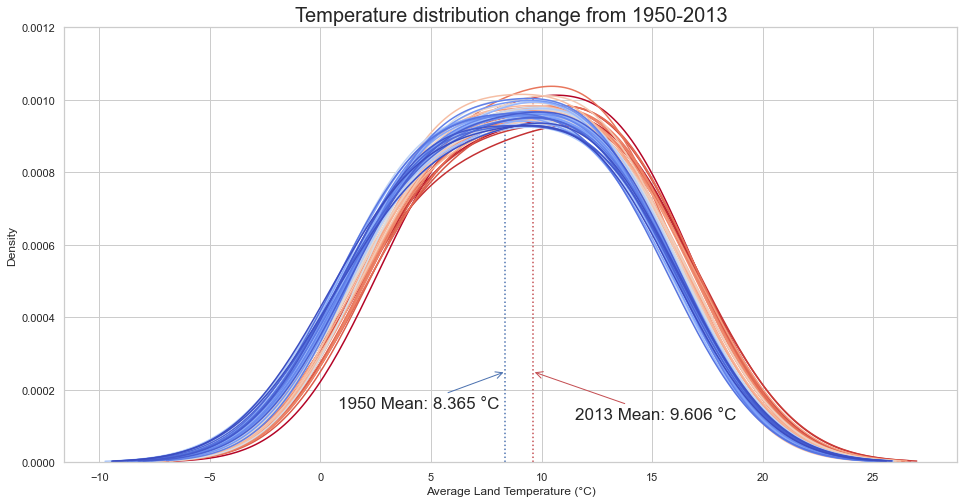

In [5]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set(style="whitegrid")
sns.kdeplot(data=global_temp, x='LandAverageTemperature', hue='Year', palette='coolwarm', bw_adjust=1.4,legend=False)

kdeline = ax.lines[0]

#getting the mean values for the first (1950) and last (2013) years in the dataset
mean1950  = global_temp[global_temp['Year']==1950]['LandAverageTemperature'].mean()
mean2013  = global_temp[global_temp['Year']==2013]['LandAverageTemperature'].mean()

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height1950 = np.interp(mean1950, xs, ys)
height2013 = np.interp(mean2013, xs, ys)
#plotting the vertical lines indicating the means
ax.vlines(mean1950, 0, height1950, color='b', ls=':')
ax.vlines(mean2013, 0, height2013, color='r', ls=':')

#plotting the arrows point to the respective mean lines
ax.annotate("1950 Mean: %s °C"%round(mean1950,3), xy = (mean1950,0.00025),
             xytext=(0.8,0.00015), arrowprops={'arrowstyle': '->', 'color': 'b'},size=17)

ax.annotate("2013 Mean: %s °C"%round(mean2013,3), xy = (mean2013,0.00025),
             xytext=(11.5,0.00012), arrowprops={'arrowstyle': '->', 'color': 'r'},size=17)

ax.set_title('Temperature distribution change from 1950-2013',size=20)
ax.set_xlabel('Average Land Temperature (°C)')
ax.set_ylim(0,0.0012);
plt.savefig('Distribution.png', bbox_inches='tight')
